In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score,roc_curve,classification_report
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('customer_churn_data.csv')

In [5]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [46]:
df['Churn'].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df['Churn'].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

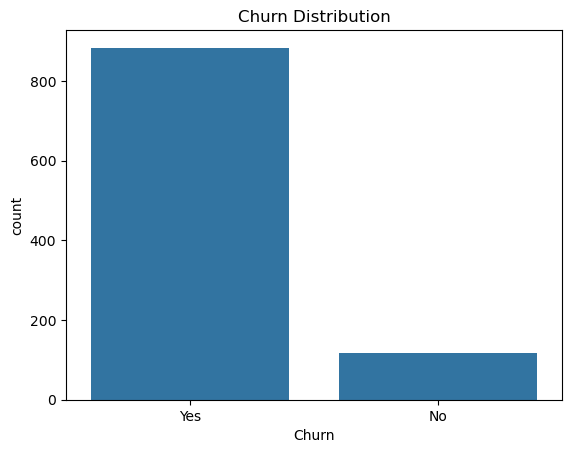

In [6]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


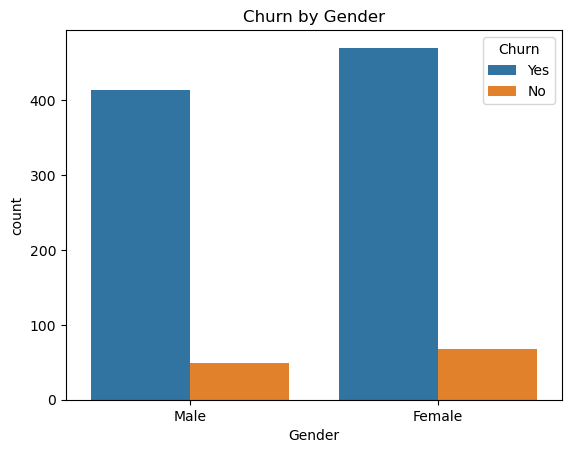

In [7]:
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()


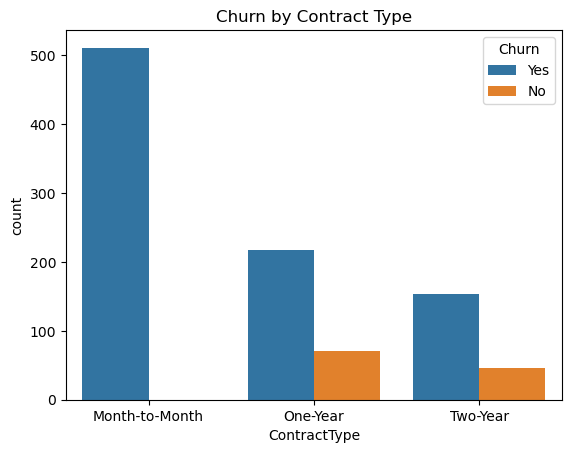

In [8]:
sns.countplot(x='ContractType', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()


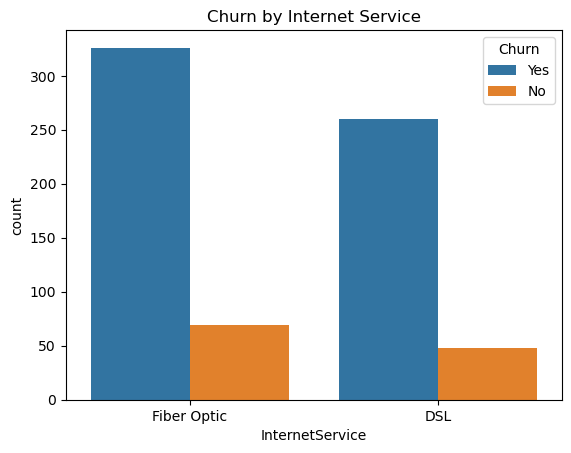

In [9]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()


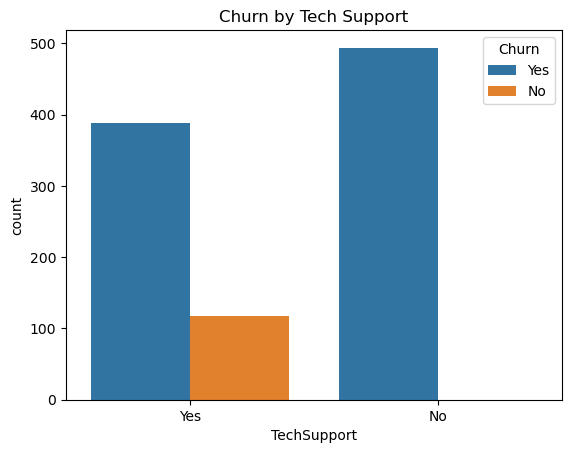

In [10]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title("Churn by Tech Support")
plt.show()


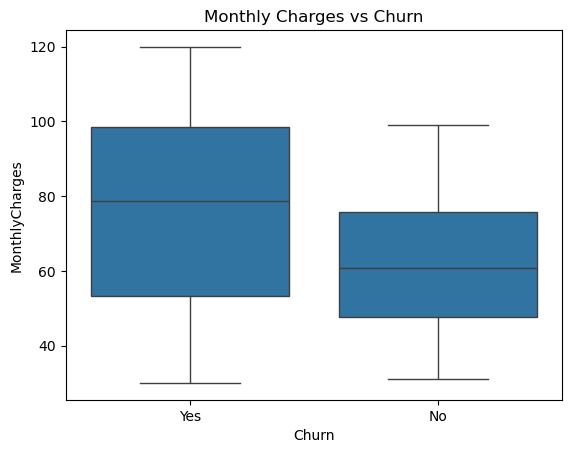

In [11]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


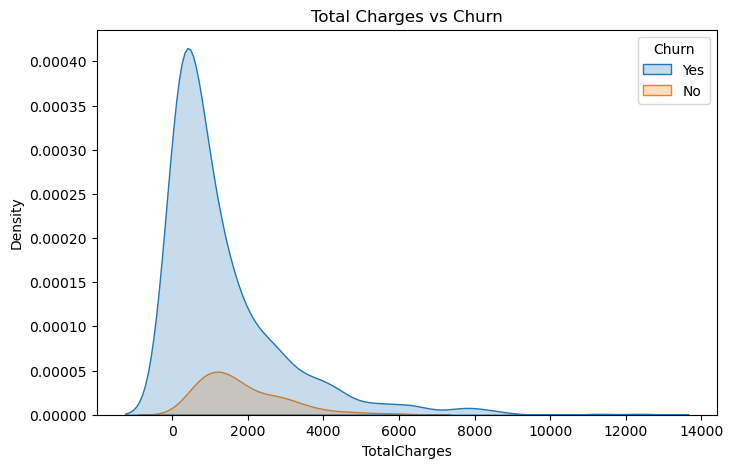

In [12]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', shade=True)
plt.title("Total Charges vs Churn")
plt.show()


                     Age    Tenure  MonthlyCharges  TotalCharges
Age             1.000000  0.000472        0.006362     -0.001896
Tenure          0.000472  1.000000       -0.014552      0.894868
MonthlyCharges  0.006362 -0.014552        1.000000      0.304893
TotalCharges   -0.001896  0.894868        0.304893      1.000000


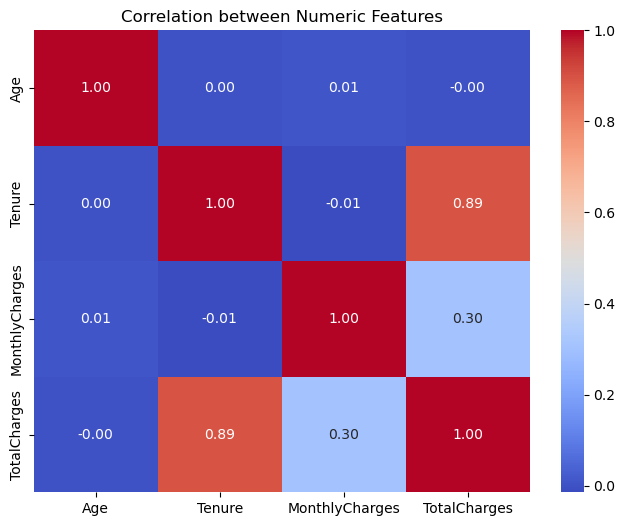

In [13]:
numeric_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']

# Step 1: Correlation matrix calculate karo
corr = df[numeric_cols].corr()   # <- ye line define karti hai corr variable

# Step 2: Print correlation matrix
print(corr)

# Step 3: Heatmap plot karo
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Numeric Features")
plt.show()

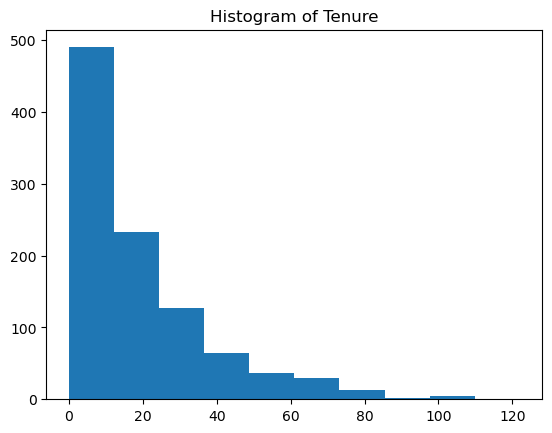

In [14]:
plt.hist(df['Tenure'])
plt.title("Histogram of Tenure")
plt.show()

In [9]:
X=df.drop("Churn",axis=1)
y = df[['Churn']]  # DataFrame
y['Churn'] = y['Churn'].apply(lambda x: 1 if x=='Yes' else 0)


In [10]:
X.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport'],
      dtype='object')

In [11]:
X.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes


In [12]:
X.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No


In [13]:
X=X[['ContractType', 'TechSupport', 'Gender', 'InternetService', 'Tenure', 'MonthlyCharges','TotalCharges']]

In [14]:
X.head(1)

,ContractType,TechSupport,Gender,InternetService,Tenure,MonthlyCharges,TotalCharges
0,Month-to-Month,Yes,Male,Fiber Optic,4,88.35,353.4


In [15]:
X = pd.get_dummies(X, columns=['InternetService'], drop_first=True)

In [16]:
X['Gender']=X['Gender'].apply(lambda x:1 if x=='Female' else 0)
X['TechSupport']=X['TechSupport'].apply(lambda x:1 if x=='Yes' else 0)

In [17]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    395
DSL            308
Name: count, dtype: int64

In [18]:
X.head()

,ContractType,TechSupport,Gender,Tenure,MonthlyCharges,TotalCharges,InternetService_Fiber Optic
0,Month-to-Month,1,0,4,88.35,353.40,True
1,Month-to-Month,1,0,0,36.67,0.00,True
2,Month-to-Month,0,1,2,63.79,127.58,True
3,One-Year,1,1,8,102.34,818.72,False
4,Month-to-Month,0,0,32,69.01,2208.32,False


In [19]:
X['TotalCharges'].max()

12416.25

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['ContractType'] = le.fit_transform(X['ContractType'])


In [21]:
X.head()

,ContractType,TechSupport,Gender,Tenure,MonthlyCharges,TotalCharges,InternetService_Fiber Optic
0,0,1,0,4,88.35,353.40,True
1,0,1,0,0,36.67,0.00,True
2,0,0,1,2,63.79,127.58,True
3,1,1,1,8,102.34,818.72,False
4,0,0,0,32,69.01,2208.32,False


In [22]:
X=X.astype(int)

In [23]:
X.head()

,ContractType,TechSupport,Gender,Tenure,MonthlyCharges,TotalCharges,InternetService_Fiber Optic
0,0,1,0,4,88,353,1
1,0,1,0,0,36,0,1
2,0,0,1,2,63,127,1
3,1,1,1,8,102,818,0
4,0,0,0,32,69,2208,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [25]:
scaler=StandardScaler()

In [26]:
X_train=scaler.fit_transform(X_train)

In [27]:
X_test=scaler.fit_transform(X_test)

In [28]:
import joblib
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [30]:

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_res.value_counts())


Before SMOTE:
Churn
1        706
0         94
Name: count, dtype: int64

After SMOTE:
Churn
0        706
1        706
Name: count, dtype: int64


In [31]:
def modelperformance(pred):
    print("Accuracy is :{}".format(accuracy_score(y_test,pred)))
    print("F1 score is :{}".format(f1_score(y_test,pred)))

In [32]:
log_model = LogisticRegression()

In [56]:
log_model.fit(X_train_res,y_train_res)

LogisticRegression()

In [57]:
y_predLR=log_model.predict(X_test)

In [58]:
modelperformance(y_predLR)

Accuracy is :0.875
F1 score is :0.924924924924925


In [61]:
#KNN
knn_model = KNeighborsClassifier()

In [62]:
param_grid_knn={
    'n_neighbors':[3,5,7,9,11,13,15,17],
    'weights':['uniform','distance']
}

In [63]:
gridknn=GridSearchCV(KNeighborsClassifier(),param_grid_knn,cv=5)

In [64]:
gridknn.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
                         'weights': ['uniform', 'distance']})

In [65]:
gridknn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [66]:
y_pred_knn=gridknn.predict(X_test)

In [67]:
modelperformance(y_pred_knn)

Accuracy is :0.965
F1 score is :0.98005698005698


In [70]:
from sklearn.svm import SVC

In [71]:
svm=SVC()

In [72]:
param_grid_svm={
    'C':[0.01,0.1,0.5,1],
    'kernel':['linear','rbf','poly']
}

In [73]:
gridsvm=GridSearchCV(SVC(),param_grid_svm,cv=5)

In [74]:
gridsvm.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [75]:
gridsvm.best_params_

{'C': 1, 'kernel': 'rbf'}

In [76]:
y_pred_svm=gridsvm.predict(X_test)

In [77]:
modelperformance(y_pred_svm)

Accuracy is :0.975
F1 score is :0.9857549857549858


In [78]:
y_train_pred = gridsvm.predict(X_train_res)
y_test_pred  = gridsvm.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score

print("Train Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1:", f1_score(y_train_res, y_train_pred))
print("Test F1:", f1_score(y_test, y_test_pred))


Train Accuracy: 0.9851274787535411
Test Accuracy: 0.975
Train F1: 0.9849246231155779
Test F1: 0.9857549857549858


In [79]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
print("CV scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


CV scores: [0.885 0.885 0.885 0.88  0.88 ]
Mean CV accuracy: 0.883


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier( n_estimators=200,
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,           
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_res, y_train_res)
best_rf = random_search.best_estimator_
print("Best Params:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


Best Params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 15}


In [34]:
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:,1]  # probability of Churn=Yes


In [35]:
best_rf = random_search.best_estimator_

y_train_pred = best_rf.predict(X_train_res)
y_test_pred = best_rf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train F1:", f1_score(y_train_res, y_train_pred))
print("Test F1:", f1_score(y_test, y_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.99
Train F1: 1.0
Test F1: 0.9943181818181818


In [36]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X_train_res, y_train_res, cv=5)
print("CV scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


CV scores: [0.99293286 1.         1.         1.         1.        ]
Mean CV accuracy: 0.9985865724381625


In [98]:
import joblib

columns = list(X.columns)
joblib.dump(columns, 'columns.pkl')


['columns.pkl']

In [99]:
best_rf = random_search.best_estimator_


In [100]:
joblib.dump(best_rf,'model.pkl')

['model.pkl']

In [101]:
X.columns

Index(['ContractType', 'TechSupport', 'Gender', 'Tenure', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber Optic'],
      dtype='object')

Confusion Matrix:
 [[ 23   0]
 [  2 175]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.99      0.99       177

    accuracy                           0.99       200
   macro avg       0.96      0.99      0.98       200
weighted avg       0.99      0.99      0.99       200

ROC-AUC Score: 1.0


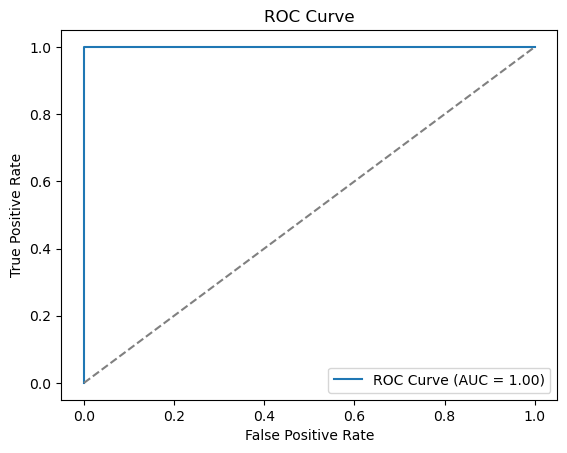

PR-AUC Score: 1.0


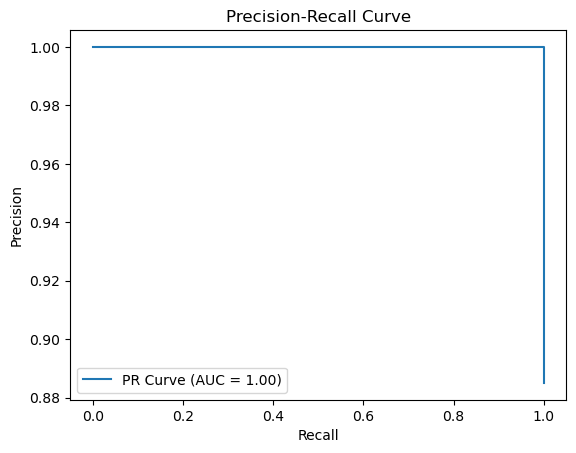

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt



cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print("PR-AUC Score:", pr_auc)

plt.figure()
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
#Checking Data Leakage
import numpy as np
from sklearn.utils import shuffle
y_shuffled = shuffle(y, random_state=42)
scores = cross_val_score(model, X, y_shuffled, cv=5)
print("Shuffled CV Accuracy:", scores.mean())


Shuffled CV Accuracy: 0.733
